In [28]:
# Following closely from:
# https://github.com/rOpenGov/pollstR

library("devtools")
install_github("rOpenGov/pollstR")

library(pollstR)

# Define the slug for the election URL
slug <- "2016-general-election-trump-vs-clinton"

# Get polls from the API
elec_2016_polls <- pollster_chart_data(slug)

Skipping install of 'pollstR' from a github remote, the SHA1 (2cda953f) has not changed since last install.
  Use `force = TRUE` to force installation
Parsed with column specification:
cols(
  Trump = col_double(),
  Clinton = col_double(),
  Other = col_double(),
  Undecided = col_double(),
  poll_id = col_integer(),
  pollster = col_character(),
  start_date = col_date(format = ""),
  end_date = col_date(format = ""),
  sample_subpopulation = col_character(),
  sample_size = col_integer(),
  mode = col_character(),
  partisanship = col_character(),
  partisan_affiliation = col_character()
)


In [8]:
elec_2016_polls

Trump,Clinton,Other,Undecided,poll_id,pollster,start_date,end_date,sample_subpopulation,sample_size,mode,partisanship,partisan_affiliation
43,48,3,6,26753,NBC/WSJ,2016-11-03,2016-11-05,Likely Voters,1282,Live Phone,Nonpartisan,None
44,45,4,7,26750,IBD/TIPP,2016-11-02,2016-11-05,Likely Voters,903,Live Phone,Nonpartisan,None
44,49,4,2,26747,ABC/Post,2016-11-01,2016-11-04,Likely Voters,1685,Live Phone,Nonpartisan,None
40,44,7,10,26740,Ipsos/Reuters,2016-10-31,2016-11-04,Likely Voters,2244,Internet,Nonpartisan,None
48,49,3,NA,26741,UPI/CVOTER,2016-10-29,2016-11-04,Likely Voters,1479,Internet,Nonpartisan,None
44,46,8,2,26734,McClatchy/Marist,2016-11-01,2016-11-03,Likely Voters,940,Live Phone,Nonpartisan,None
45,46,1,6,26728,FOX,2016-11-01,2016-11-03,Likely Voters,1107,Live Phone,Nonpartisan,None
45,48,7,NA,26618,YouGov/Economist,2016-10-30,2016-11-01,Likely Voters,1233,Internet,Nonpartisan,None
44,47,5,5,26647,CBS/Times,2016-10-28,2016-11-01,Likely Voters,1333,Live Phone,Nonpartisan,None
44,44,5,7,26612,IBD/TIPP,2016-10-28,2016-11-01,Likely Voters,862,Live Phone,Nonpartisan,None


In [14]:
mean(elec_2016_polls$Trump)

[1] 41.26757

In [15]:
mean(elec_2016_polls$Clinton)

[1] 46.41351

In [20]:
library("ggplot2")
library("dplyr")
library("tidyr")

elec_2016_polls_tidy <-
  elec_2016_polls %>%
  gather(choice, value, one_of("Clinton", "Trump", "Undecided", "Other")) %>%
  mutate(date = start_date +
           difftime(end_date, start_date, units = "days") / 2) %>%
  filter(!is.na(value))
glimpse(elec_2016_polls_tidy)

Observations: 1,302
Variables: 12
$ poll_id              <int> 26753, 26750, 26747, 26740, 26741, 26734, 2672...
$ pollster             <chr> "NBC/WSJ", "IBD/TIPP", "ABC/Post", "Ipsos/Reut...
$ start_date           <date> 2016-11-03, 2016-11-02, 2016-11-01, 2016-10-3...
$ end_date             <date> 2016-11-05, 2016-11-05, 2016-11-04, 2016-11-0...
$ sample_subpopulation <chr> "Likely Voters", "Likely Voters", "Likely Vote...
$ sample_size          <int> 1282, 903, 1685, 2244, 1479, 940, 1107, 1233, ...
$ mode                 <chr> "Live Phone", "Live Phone", "Live Phone", "Int...
$ partisanship         <chr> "Nonpartisan", "Nonpartisan", "Nonpartisan", "...
$ partisan_affiliation <chr> "None", "None", "None", "None", "None", "None"...
$ choice               <chr> "Clinton", "Clinton", "Clinton", "Clinton", "C...
$ value                <dbl> 48, 45, 49, 44, 49, 46, 46, 48, 47, 44, 50, 48...
$ date                 <date> 2016-11-04, 2016-11-04, 2016-11-03, 2016-11-0...


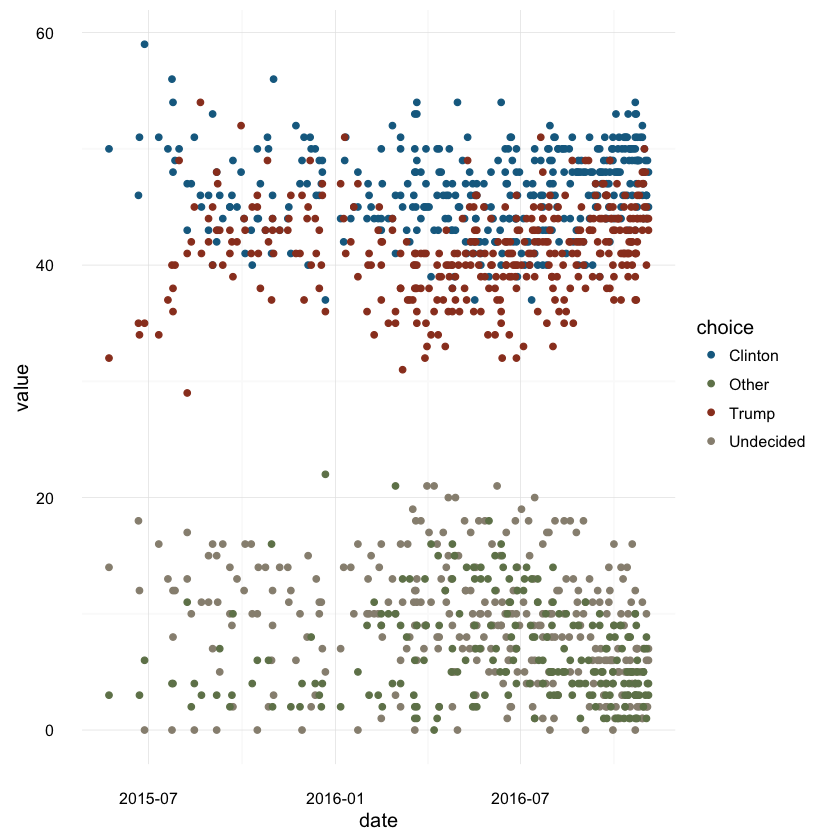

In [21]:
choice_colours <- c("Trump" = "#9A3E25", "Clinton" = "#156B90", "Other" = "#708259", "Undecided" = "#978F80")
scale_colour_elec_2016 <- function(...) {
  scale_colour_manual(values = choice_colours)
}
scale_fill_elec_2016 <- function(...) {
  scale_fill_manual(values = choice_colours)
}

plot_elec_2016_1 <-
  ggplot(elec_2016_polls_tidy, aes(x = date, y = value, colour = choice)) +
  geom_point() +
  scale_colour_elec_2016() +
  theme_minimal()
plot_elec_2016_1

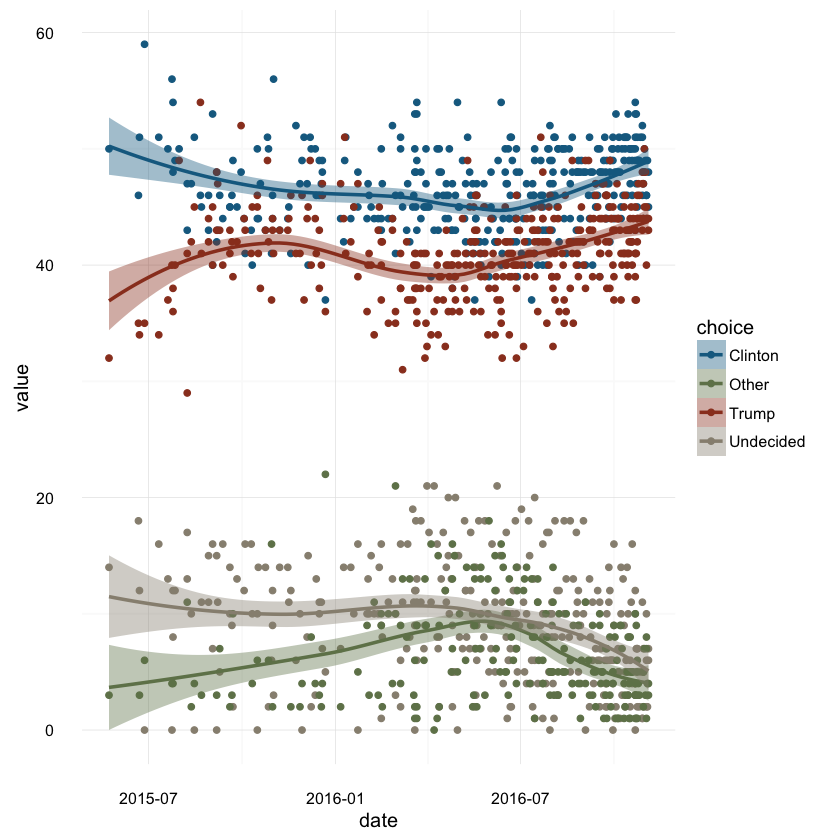

In [22]:
plot_elec_2016_1 +
  geom_smooth(aes(fill = choice), method = "loess") +
  scale_fill_elec_2016()

In [27]:
elec_2016_est <- pollster_chart(slug)